# Exploration du jeu de données

La base de données sur laquelle nous allons travailler est la base [MNIST](http://yann.lecun.com/exdb/mnist/) qui regroupe un grand nombre de chiffres écrits à la main et leur label correspondant. Voyons à quoi elle ressemble.

Tensorflow propose directement de télécharger ces données via son API sous la forme d'un jeu de données d'entrainement et un jeu de données de test

In [3]:
#!pip install tensorflow

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Structure des données

Les variables x et y sont des tableaux de type numpy.ndarray de 60K lignes pour les données d'entrainement et de 10 000 pour les données de test.

Afficher les différentes structures de données, et au moins une des valeurs pour chaque type.

In [8]:
x_train.shape

(60000, 28, 28)

In [25]:
x_train.__len__()

60000

In [9]:
x_test.shape

(10000, 28, 28)

In [15]:
x_train[0][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

## Visualisation des données

In [16]:
import matplotlib.pyplot as plt
import random

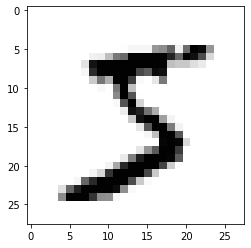

In [17]:
plt.imshow(x_train[0], cmap='Greys')

Visualisation d'une image au hasard dans l'ensemble d'entrainement et donner son étiquette associée:

In [27]:
rand_num = random.randint(0,len(x_train))
rand_num

57115

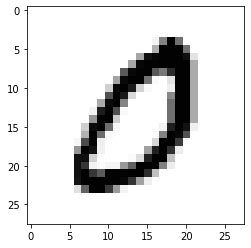

In [28]:
plt.imshow(x_train[rand_num], cmap='Greys')

In [29]:
y_train[rand_num]

0

Visualisation d'une image au hasard dans l'ensemble de test et donner son étiquette associée:

In [30]:
rand_test = random.randint(0,len(x_test))

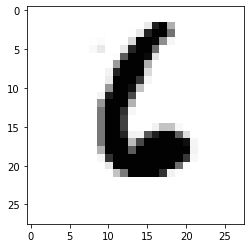

In [31]:
plt.imshow(x_train[rand_test], cmap='Greys')

In [32]:
y_train[rand_test]

6

## Manipulation des images

Créer un pourtour noir d'un pixel autour d'une image choisie et l'afficher.

In [33]:
rand_black = random.randint(0,len(x_test))

In [62]:
def frame(matrix):
    framed = []
    for i in range(len(matrix)):
        tmp = []
        if i==len(matrix)-1 or i==0:
            tmp = np.full(len(matrix),255)
        else:
            tmp = matrix[i].copy()
            tmp[0],tmp[len(matrix)-1] = 255,255
        framed.append(tmp.copy())
    return np.array(framed)

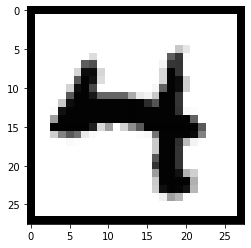

In [65]:
plt.imshow(frame(x_train[rand_black]), cmap='Greys')

## Utilisation des algorithmes connus

Entre kNN et kmeans, quel serait l'algorithme le plus adéquat pour déterminer le type d'une image de l'ensemble de test. En essayer une implémentation, et donner la précision que cela vous donne.

```diff
KMeans, pour classifier des images (déterminer un type)
```

In [68]:
from sklearn.cluster import KMeans as kmean

In [69]:
def flatten_list_of_matrix(liste):
    return list(i.flatten() for i in liste)

In [76]:
flat = flatten_list_of_matrix(x_train)

In [79]:
import pandas as pd
pd.DataFrame(flat)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
kdigit = kmean(n_clusters=10, random_state=0).fit(flat)

In [82]:
from IPython.display import display
display(kdigit.score(flat))
display(kdigit.labels_)
display(kdigit.cluster_centers_)

-152992610794.65628

array([5, 2, 1, ..., 5, 9, 0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Y One hot encoded

Tranformation de y en une liste de vecteur de type "one hot encoded": vecteur de la taille de l'ensemble des catégories, toutes les valeurs sont nulles sauf celle qui correspond à sa catégorie qui vaut 1.

Par exemple le `5` vaut `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`. Trouver et implémenter la fonction qui permet de faire ça.

## Etude de la fonction softmax

Quel est l'usage de cette fontion?

Le fonction softmax $\sigma$ est définie de la façon suivante:
$\sigma : R^K \to R^K$

A un vecteur $$z=(z_1,...,z_K)$$ on associe un vecteur $$\sigma=(\sigma_1,...,\sigma_K)$$ tel que pour chaque j $$\sigma(z)_j = \displaystyle\frac{e^{z_j}}{\sum\limits_{k=1}^{K} e^{z_k}}$$

Créer une fonction python qui implémente cette fonction softmax, et la tester sur `z = np.array([123, 456, 789])`. 
Que remarquez vous ?

Comment régler le problème rencontré? Réécrire la fonction numériquement stable.